## 1. Python Configuration and Data Loading

In [1]:
import sys
if sys.version_info[0] < 3:
    raise Exception("Python 3 not detected.")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from scipy import io

for data_name in ["mnist", "spam", "cifar10"]:
    data = io.loadmat("data/%s_data.mat" % data_name)
    print("\nloaded %s data!" % data_name)
    fields = "test_data", "training_data", "training_labels"
    for field in fields:
        print(field, data[field].shape)


loaded mnist data!
test_data (10000, 784)
training_data (60000, 784)
training_labels (60000, 1)

loaded spam data!
test_data (5857, 32)
training_data (5172, 32)
training_labels (5172, 1)

loaded cifar10 data!
test_data (10000, 3072)
training_data (50000, 3072)
training_labels (50000, 1)


## 2. Data Partitioning

In [ ]:
def split(name, num_val):
    data = io.loadmat("data/%s_data.mat" % name)
    size = data['training_data'].shape[0]
    idx = np.random.choice(size, size=size, replace=False)
    x, y = data['training_data'][idx], data['training_labels'][idx]
    val_x, val_y = x[:num_val,:], y[:num_val,:]
    tra_x, tra_y = x[num_val:,:], y[num_val:,:]
    return tra_x, tra_y, val_x, val_y
mnist_train_x, mnist_train_y, mnist_val_x, mnist_val_y = split('mnist', 10000)
spam_train_x, spam_train_y, spam_val_x, spam_val_y = split('spam', int(5172*0.2))
cifar10_train_x, cifar10_train_y, cifar10_val_x, cifar10_val_y = split('cifar10', 5000)

## 3. Support Vector Machines: Coding

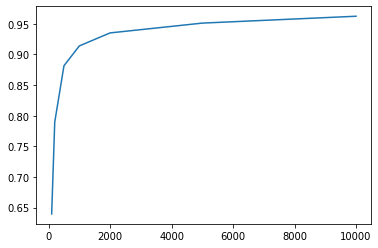

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# MNIST

N_SAMPLE =[100, 200, 500, 1000, 2000, 5000, 10000]
acc = []

for i in range(7):
    model_3a = SVC()
    model_3a.fit(mnist_train_x[:N_SAMPLE[i], :].astype(np.int), mnist_train_y[:N_SAMPLE[i], :].astype(np.int).reshape(-1))
    predict_3a = model_3a.predict(mnist_val_x.astype(np.int))
    score = accuracy_score(predict_3a, mnist_val_y.reshape(-1).astype(np.int))
    acc.append(score)
plt.plot(N_SAMPLE, acc);

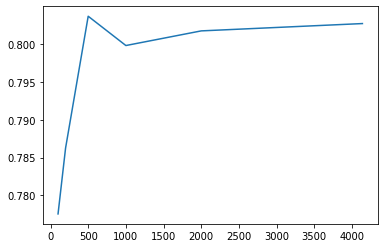

In [36]:
# SPAM

N_SAMPLE =[100, 200, 500, 1000, 2000, 4138]
acc = []

for i in range(6):
    model_3b = SVC(kernel='linear')
    model_3b.fit(spam_train_x[:N_SAMPLE[i], :].astype(np.int), spam_train_y[:N_SAMPLE[i], :].astype(np.int).reshape(-1))
    predict_3b = model_3b.predict(spam_val_x.astype(np.int))
    score = accuracy_score(predict_3b, spam_val_y.reshape(-1).astype(np.int))
    acc.append(score)
plt.plot(N_SAMPLE, acc);

In [ ]:
# CIFAR-10
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

N_SAMPLE =[100, 200, 500, 1000, 2000, 5000]
acc = []

for i in range(6):
    model_3c = SVC(kernel='linear')
    model_3c.fit(cifar10_train_x[:N_SAMPLE[i], :].astype(np.int), cifar10_train_y[:N_SAMPLE[i], :].astype(np.int).reshape(-1))
    predict_3c = model_3c.predict(cifar10_val_x.astype(np.int))
    score = accuracy_score(predict_3c, cifar10_val_y.reshape(-1).astype(np.int))
    acc.append(score)
plt.plot(N_SAMPLE, acc);

## 4. Hyperparameter Tuning

2.5:0.9711
2.6:0.9709
2.75:0.9708
2.8:0.9708
3:0.9708
3.25:0.9707


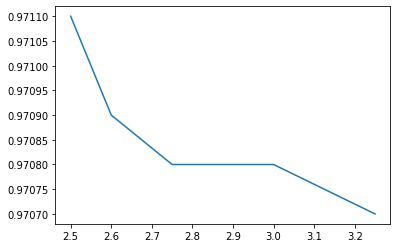

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

C = [2.5, 2.6, 2.75, 2.8, 3, 3.25]
acc = []
for i in range(len(C)):
    model_4 = SVC(C = C[i])
    model_4.fit(mnist_train_x[:10000, :].astype(np.int), mnist_train_y[:10000, :].astype(np.int).reshape(-1))
    predict_4 = model_4.predict(mnist_val_x.astype(np.int))
    score = accuracy_score(predict_4, mnist_val_y.reshape(-1).astype(np.int))
    acc.append(score)
    print(str(C[i])+':'+str(score))
plt.plot(C, acc);

## 5. K-Fold Cross-Validation

10:0.7447015950438708
10.25:0.7445081714461917
10.5:0.7450884422392285
10.75:0.7448950186415496
11:0.7450884422392285
11.25:0.7447017819265738
11.5:0.7454754763172895
11.75:0.7450886291219316
12:0.7447017819265738


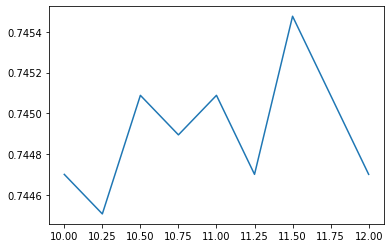

In [10]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

spam = data = io.loadmat("data/spam_data.mat")
size = len(spam['training_data'])

def cross_validation(c):
    acc = []
    for i in range(5):
        s, e = int(size/5*i), int(size/5*(i+1))
        val_x, val_y = spam["training_data"][s:e], spam["training_labels"][s:e]
        train_x, train_y = np.vstack((spam["training_data"][e:], spam["training_data"][0:s])), np.vstack((spam["training_labels"][e:], spam["training_labels"][0:s]))
        model_5 = SVC(C=c)
        model_5.fit(train_x.astype(np.int), train_y.astype(np.int).reshape(-1))
        predict_5 = model_5.predict(val_x)
        acc.append(accuracy_score(predict_5, val_y.reshape(-1).astype(np.int)))
    return np.mean(acc)

C = [10,10.25, 10.5, 10.75, 11, 11.25, 11.5, 11.75, 12]
accuracy = []

for i in range(len(C)):
    score = cross_validation(C[i])
    accuracy.append(score)
    print(str(C[i])+':'+str(score))
plt.plot(C, accuracy);

## 6. Kaggle

In [7]:
from sklearn.svm import SVC
# MNIST
mnist_data = io.loadmat("data/mnist_data.mat")
mnist_train_x,  mnist_train_y, mnist_test_x = mnist_data['training_data'], mnist_data['training_labels'],mnist_data['test_data']
model_mnist = SVC(C=2.5)
model_mnist.fit(mnist_train_x.astype(np.int), mnist_train_y.astype(np.int).reshape(-1))
mnist_test_y = model_mnist.predict(mnist_test_x)
d = {'Id': np.arange(1, len(mnist_test_y)+1), 'Category': mnist_test_y}
pd.DataFrame(data=d).to_csv('mnist.csv', index=False)

In [8]:
# SPAM
spam_data = io.loadmat("data/spam_data.mat")
spam_train_x,  spam_train_y, spam_test_x = spam_data['training_data'], spam_data['training_labels'],spam_data['test_data']
model_spam = SVC(C=11.5, kernel='linear')
model_spam.fit(spam_train_x.astype(np.int), spam_train_y.astype(np.int).reshape(-1))
spam_test_y = model_spam.predict(spam_test_x)
d = {'Id': np.arange(1, len(spam_test_y)+1), 'Category': spam_test_y}
pd.DataFrame(data=d).to_csv('spam.csv', index=False)

In [ ]:
from sklearn.svm import SVC
# CIFAR-10
cifar10_data = io.loadmat("data/cifar10_data.mat")
cifar10_train_x,  cifar10_train_y, cifar10_test_x = cifar10_data['training_data'], cifar10_data['training_labels'],cifar10_data['test_data']
model_cifar10 = SVC(kernel='linear')
model_cifar10.fit(cifar10_train_x.astype(np.int), cifar10_train_y.astype(np.int).reshape(-1))
cifar10_test_y = model_cifar10.predict(cifar10_test_x)
d = {'Id': np.arange(1, len(cifar10_test_y)+1), 'Category': cifar10_test_y}
pd.DataFrame(data=d).to_csv('cifar10.csv', index=False)